# 4.10 Coding etiquette & Excel reporting

Table of contents

#### 1. Import data and libraries
#### 2. Addressing PII data
#### 3. Check missing values
#### 4. Analyse spending habits between different US regions
#### 5. Define and exclude low-activity customers
#### 6. Customer profiling
#### 7. Distribution of customer profiles
#### 8. Statistics on customer-profile for order frequency and expenditures
#### 9. Customer´s behaviour analysis by region
#### 10. Visualizations

## 1. Import data and libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create a path

path = r'/Users/giadairene/Documents/CareerFoundry Data Analytics/Data Analytics Immersion/Achievement 4/Instacart Basket Analysis'

In [3]:
# Import final dataset

df_final = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final.pkl'))

In [137]:
# Import departments_wrangled.csv

df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = 0)

## 2. Addressing PII data

In [4]:
# Creating a new version of the dataframe without the columns containing PII data ('first_name' and 'last_name')

df = df_final.drop('first_name', axis=1)

In [5]:
df = df.drop('last_name', axis=1)

In [6]:
# Check the output

df.head()

,user_id,gender,state,age,date_joined,no_of_dependants,family_status,income,product_id,product_name,...,price_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,average_product_price,spending_flag,median_days_between_orders,frequency_flag,merge_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Mid-range product,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Mid-range product,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Mid-range product,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Low-range product,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Low-range product,Least busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both


In [7]:
df.shape

(32404859, 32)

## 3. Check missing values

In [8]:
df.isnull().sum()

user_id                             0
gender                              0
state                               0
age                                 0
date_joined                         0
no_of_dependants                    0
family_status                       0
income                              0
product_id                          0
product_name                        0
aisle_id                            0
department_id                       0
prices                           5127
order_id                            0
order_number                        0
orders_day_of_week                  0
order_hour_of_day                   0
days_since_prior_order        2076096
first_order                         0
add_to_cart_order                   0
reordered                           0
_merge                              0
price_range_loc                     0
busiest_day                         0
busiest_period_of_day               0
max_order                           0
loyalty_flag

#### There are 5 unusual missing values in the 'median_days_between_orders' column.

In [9]:
# Print the missing values

bool_series = pd.isnull(df['median_days_between_orders'])  

In [10]:
df[bool_series]

,user_id,gender,state,age,date_joined,no_of_dependants,family_status,income,product_id,product_name,...,price_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,average_product_price,spending_flag,median_days_between_orders,frequency_flag,merge_flag
18509448,159838,Male,Arkansas,63,11/9/2018,3,married,140994,10749,Organic Red Bell Pepper,...,Mid-range product,Busiest days,Average orders,1,New customer,7.42,Low spender,NaN,nan,both
18509449,159838,Male,Arkansas,63,11/9/2018,3,married,140994,21334,Organic Peeled Garlic,...,Mid-range product,Busiest days,Average orders,1,New customer,7.42,Low spender,NaN,nan,both
18509450,159838,Male,Arkansas,63,11/9/2018,3,married,140994,22198,4X Ultra Concentrated Natural Laundry Detergen...,...,Low-range product,Busiest days,Average orders,1,New customer,7.42,Low spender,NaN,nan,both
18509451,159838,Male,Arkansas,63,11/9/2018,3,married,140994,23695,California Veggie Burger,...,Low-range product,Busiest days,Average orders,1,New customer,7.42,Low spender,NaN,nan,both
18509452,159838,Male,Arkansas,63,11/9/2018,3,married,140994,33401,Goat Cheese Crumbles,...,Mid-range product,Busiest days,Average orders,1,New customer,7.42,Low spender,NaN,nan,both


#### Customer 159838 has probably made only 1 single order on the platform.

## 4. Analyse spending habits between different US regions

### 4.1 Create a new 'region' column based on the 'state' column

In [11]:
# Check the values of the 'state' column

df['state'].value_counts()

state
Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mi

In [12]:
# Define regions using loc() function

df.loc[df['state'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut',
                         'New York', 'Pennsylvania', 'New Jersey']), 'region'] = 'Northeast'

In [13]:
df.loc[df['state'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota',
                         'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']), 'region'] = 'Midwest'

In [14]:
df.loc[df['state'].isin(['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina',
                         'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi',
                         'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']), 'region'] = 'South'

In [15]:
df.loc[df['state'].isin(['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico',
                         'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']), 'region'] = 'West'

In [16]:
# Check frequency of new region column

df['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [17]:
# Check updated dataframe

df.head()

,user_id,gender,state,age,date_joined,no_of_dependants,family_status,income,product_id,product_name,...,busiest_day,busiest_period_of_day,max_order,loyalty_flag,average_product_price,spending_flag,median_days_between_orders,frequency_flag,merge_flag,region
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Least busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest


In [18]:
df.shape

(32404859, 33)

In [19]:
df.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined', 'no_of_dependants',
       'family_status', 'income', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'order_id', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'first_order', 'add_to_cart_order', 'reordered', '_merge',
       'price_range_loc', 'busiest_day', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'average_product_price', 'spending_flag',
       'median_days_between_orders', 'frequency_flag', 'merge_flag', 'region'],
      dtype='object')

In [29]:
# Check frequency of '_merge' column

df['_merge'].value_counts(dropna = False)

_merge
both          32404859
left_only            0
right_only           0
Name: count, dtype: int64

In [30]:
# Check frequency of 'merge_flag' column

df['merge_flag'].value_counts(dropna = False)

merge_flag
both          32404859
left_only            0
right_only           0
Name: count, dtype: int64

In [31]:
# Drop '_merge' and 'merge_flag' columns as they are not necessary

df = df.drop('_merge', axis=1)

In [32]:
df = df.drop('merge_flag', axis=1)

In [33]:
# Check updated dataframe

df.head()

,user_id,gender,state,age,date_joined,no_of_dependants,family_status,income,product_id,product_name,...,busiest_day,busiest_period_of_day,max_order,loyalty_flag,average_product_price,spending_flag,median_days_between_orders,frequency_flag,region,customer_activity
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,high_activity customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,high_activity customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,high_activity customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,low_activity customers
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Least busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,low_activity customers


### 4.2 Determine spending habits by region

In [20]:
# Create crosstab between 'spending_flag' column and 'region' column

spend_by_region = pd.crosstab(df['region'], df['spending_flag'], dropna = False).sort_values(by = 'High spender', ascending = False)

In [21]:
spend_by_region

spending_flag,High spender,Low spender
region,,
South,209691,10582194
West,160354,8132559
Midwest,155975,7441350
Northeast,108225,5614511


In [22]:
# Create crosstab between 'frequency_flag' column and 'region' column

frequency_by_region = pd.crosstab(df['region'], df['frequency_flag'], dropna = False).sort_values(by = 'Frequent customer', ascending = False)

In [23]:
frequency_by_region

frequency_flag,Frequent customer,Non-frequent customer,Regular customer,nan
region,,,,
South,7192372,1215088,2384420,5
West,5545206,927748,1819959,0
Midwest,5017709,863419,1716197,0
Northeast,3804566,630182,1287988,0


In [24]:
# Create crosstab between 'loyalty_flag' column and 'region' column

loyalty_by_region = pd.crosstab(df['region'], df['loyalty_flag'], dropna = False).sort_values(by = 'Loyal customer', ascending = False)

In [25]:
loyalty_by_region

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
South,3405844,2074410,5311631
West,2662690,1596800,4033423
Midwest,2373774,1472573,3750978
Northeast,1841785,1100207,2780744


## 5. Define and exclude low-activity customers

In [26]:
# Define low_activity customers

df.loc[df['order_number'] < 5, 'customer_activity'] = 'low_activity customers'

In [27]:
# Define high_activity customers

df.loc[df['order_number'] >= 5, 'customer_activity'] = 'high_activity customer'

In [28]:
# User count base on activity level

df['customer_activity'].value_counts(dropna= False)

customer_activity
high_activity customer    24414877
low_activity customers     7989982
Name: count, dtype: int64

In [34]:
# Create a subset containing only values flagged as 'high_activity customer'

df_high_activity = df[df['customer_activity']=='high_activity customer']

In [35]:
# Check the output

df_high_activity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24414877 entries, 0 to 32404817
Data columns (total 32 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   user_id                     object 
 1   gender                      object 
 2   state                       object 
 3   age                         int64  
 4   date_joined                 object 
 5   no_of_dependants            int64  
 6   family_status               object 
 7   income                      int64  
 8   product_id                  int64  
 9   product_name                object 
 10  aisle_id                    int64  
 11  department_id               int64  
 12  prices                      float64
 13  order_id                    int64  
 14  order_number                int64  
 15  orders_day_of_week          int64  
 16  order_hour_of_day           int64  
 17  days_since_prior_order      float64
 18  first_order                 bool   
 19  add_to_cart_order       

In [39]:
df_high_activity.head()

,user_id,gender,state,age,date_joined,no_of_dependants,family_status,income,product_id,product_name,...,busiest_day,busiest_period_of_day,max_order,loyalty_flag,average_product_price,spending_flag,median_days_between_orders,frequency_flag,region,customer_activity
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,high_activity customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,high_activity customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,high_activity customer
6,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,high_activity customer
7,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,high_activity customer


In [40]:
# Export the sample

df_high_activity.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'exclusion_flag_sample.pkl'))

In [44]:
# Change the name of the dataframe

df_all = df_high_activity

## 6. Customer profiling

In [45]:
# Check some basic statistics

df_all[['age', 'income', 'no_of_dependants']].describe()

,age,income,no_of_dependants
count,2.441488e+07,2.441488e+07,2.441488e+07
mean,4.945734e+01,9.989505e+04,1.502001e+00
std,1.848532e+01,4.333357e+04,1.119171e+00
min,1.800000e+01,2.590300e+04,0.000000e+00
25%,3.300000e+01,6.752400e+04,0.000000e+00
50%,4.900000e+01,9.683600e+04,2.000000e+00
75%,6.500000e+01,1.281600e+05,3.000000e+00
max,8.100000e+01,5.939010e+05,3.000000e+00


Customers are sorted into three categories according to their age: 'young adult' (18-40 years), 'middle age' (40-60 years), and 'senior' (over 60 years). 

Similarly, customers are stratified into four distinct tiers base on statistic percentile of income data: 'low income' (ranging from 25,903 to 67,524), 'lower-middle class' (from 67,524 to 96,836), 'upper-middle class' (from 96,836 to 128,160), and 'upper class' (from 128,160 to 593,901). 

Age and income are combined together to define customer profile, for a total of 12 (3x4) different groups.

### 6.1 Define age-income groups

In [47]:
# Define low-income young adult group

df_all.loc[(df_all['age'] >= 18) & (df_all['age'] <= 40)
           & (df_all['income'] >= 25903) & (df_all['income'] <= 67524), 'customer_profile'] = 'low-income yound adult'

In [48]:
# Define low-income mid age group

df_all.loc[(df_all['age'] > 40) & (df_all['age'] <= 60)
           & (df_all['income'] >= 25903) & (df_all['income'] <= 67524), 'customer_profile'] = 'low-income mid age'

In [49]:
# Define low-income senior group

df_all.loc[(df_all['age'] > 60)
           & (df_all['income'] >= 25903) & (df_all['income'] <= 67524), 'customer_profile'] = 'low-income senior'

In [50]:
# Define lower-middle-class young adult group

df_all.loc[(df_all['age'] >= 18) & (df_all['age'] <= 40)
           & (df_all['income'] > 67524) & (df_all['income'] <= 96836), 'customer_profile'] = 'low-mid-class yound adult'

In [51]:
# Define lower-middle-class mid age group

df_all.loc[(df_all['age'] > 40) & (df_all['age'] <= 60)
           & (df_all['income'] > 67524) & (df_all['income'] <= 96836), 'customer_profile'] = 'low-mid-class mid age'

In [52]:
# Define lower-middle-class senior group

df_all.loc[(df_all['age'] > 60)
           & (df_all['income'] > 67524) & (df_all['income'] <= 96836), 'customer_profile'] = 'low-mid-class senior'

In [53]:
# Define upper-middle-class young adult group

df_all.loc[(df_all['age'] >= 18) & (df_all['age'] <= 40)
           & (df_all['income'] > 96836) & (df_all['income'] <= 128160), 'customer_profile'] = 'up-mid-class yound adult'

In [54]:
# Define upper-middle-class mid age group

df_all.loc[(df_all['age'] > 40) & (df_all['age'] <= 60)
           & (df_all['income'] > 96836) & (df_all['income'] <= 128160), 'customer_profile'] = 'up-mid-class mid age'

In [55]:
# Define upper-middle-class senior group

df_all.loc[(df_all['age'] > 60)
           & (df_all['income'] > 96836) & (df_all['income'] <= 128160), 'customer_profile'] = 'up-mid-class senior'

In [57]:
# Define upper-class young adult group

df_all.loc[(df_all['age'] >= 18) & (df_all['age'] <= 40)
           & (df_all['income'] > 128160), 'customer_profile'] = 'upper-class yound adult'

In [58]:
# Define upper-class mid age group

df_all.loc[(df_all['age'] > 40) & (df_all['age'] <= 60)
           & (df_all['income'] > 128160), 'customer_profile'] = 'upper-class mid age'

In [59]:
# Define upper-class senior group

df_all.loc[(df_all['age'] > 60) & (df_all['income'] > 128160), 'customer_profile'] = 'upper-class senior'

### 6.2 Family status and dependants´ number by customer profile

In [60]:
# Familiy status count by customer profile

custom_family = pd.crosstab(df_all['customer_profile'], df_all['family_status'], dropna = False)

In [61]:
custom_family

family_status,divorced/widowed,living with parents and siblings,married,single
customer_profile,,,,
low-income mid age,10277,0,746440,235957
low-income senior,248303,0,760454,0
low-income yound adult,0,527068,2546000,1029235
low-mid-class mid age,11113,0,748774,232023
low-mid-class senior,277889,0,810008,0
low-mid-class yound adult,0,557200,2478487,988434
up-mid-class mid age,31658,0,2048828,648674
up-mid-class senior,710186,0,2098976,0
up-mid-class yound adult,0,72072,348912,144374


In [63]:
# Number of dependants count by customer profile

custom_dependants = pd.crosstab(df_all['customer_profile'], df_all['no_of_dependants'], dropna = False)

In [64]:
custom_dependants

no_of_dependants,0,1,2,3
customer_profile,,,,
low-income mid age,246234,249769,239394,257277
low-income senior,248303,254091,256417,249946
low-income yound adult,1029235,1012517,1033128,1027423
low-mid-class mid age,243136,257394,236367,255013
low-mid-class senior,277889,261357,285563,263088
low-mid-class yound adult,988434,1024327,999141,1012219
up-mid-class mid age,680332,695569,670170,683089
up-mid-class senior,710186,684347,706791,707838
up-mid-class yound adult,144374,137123,141101,142760


## 7. Distribution of customer profiles

In [65]:
# Distribution of customer profiles

df_all['customer_profile'].value_counts()

customer_profile
low-income yound adult       4102303
low-mid-class yound adult    4024121
upper-class senior           3063043
upper-class mid age          2932582
up-mid-class senior          2809162
up-mid-class mid age         2729160
low-mid-class senior         1087897
low-income senior            1008757
low-income mid age            992674
low-mid-class mid age         991910
up-mid-class yound adult      565358
upper-class yound adult       107910
Name: count, dtype: int64

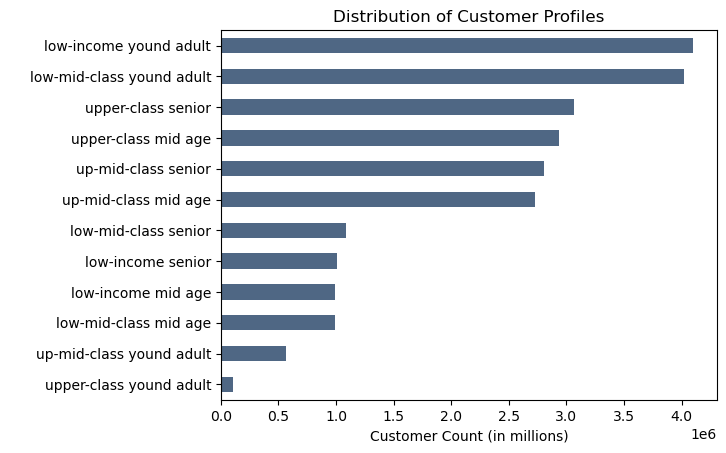

In [82]:
# Visualize the distribution of customer profile

df_all['customer_profile'].value_counts(dropna = False).sort_values(ascending = True).plot.barh(color='#4f6784')
plt.ylabel(' ') # Eliminate y lable
plt.xlabel('Customer Count (in millions)')
plt.title('Distribution of Customer Profiles') # Chart title

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'distribution_customer_profile.png'), bbox_inches='tight') # Save chart

## 8. Statistics on customer-profile for order frequency and expenditures

In [83]:
# Order frequency by customer profile

freq_custom_profile = df_all.groupby('customer_profile').agg({'days_since_prior_order': ['mean','min','max']})

In [84]:
freq_custom_profile

days_since_prior_order           
                                            mean  min   max
customer_profile                                           
low-income mid age                     10.213431  0.0  30.0
low-income senior                      10.398671  0.0  30.0
low-income yound adult                 10.148314  0.0  30.0
low-mid-class mid age                  10.071289  0.0  30.0
low-mid-class senior                    9.968782  0.0  30.0
low-mid-class yound adult              10.008146  0.0  30.0
up-mid-class mid age                   10.024781  0.0  30.0
up-mid-class senior                    10.096155  0.0  30.0
up-mid-class yound adult               10.393218  0.0  30.0
upper-class mid age                    10.111291  0.0  30.0
upper-class senior                      9.979405  0.0  30.0
upper-class yound adult                 9.681688  0.0  30.0

In [85]:
# Expenditure by customer profile

price_custom_profile = df_all.groupby('customer_profile').agg({'prices': ['mean', 'min', 'max']})

In [86]:
price_custom_profile

prices           
                               mean  min   max
customer_profile                              
low-income mid age         6.708768  1.0  25.0
low-income senior          6.730669  1.0  25.0
low-income yound adult     7.605912  1.0  25.0
low-mid-class mid age      7.935063  1.0  25.0
low-mid-class senior       7.951869  1.0  25.0
low-mid-class yound adult  7.946852  1.0  25.0
up-mid-class mid age       7.961244  1.0  25.0
up-mid-class senior        7.949555  1.0  25.0
up-mid-class yound adult   7.947680  1.0  25.0
upper-class mid age        7.947668  1.0  25.0
upper-class senior         7.950822  1.0  25.0
upper-class yound adult    7.818739  1.0  25.0

## 9. Customer´s behaviour analysis by region

### 9.1 South

In [87]:
# Create a subset for the South region

df_south = df_all[df_all['region']=='South']

In [88]:
df_south

,user_id,gender,state,age,date_joined,no_of_dependants,family_status,income,product_id,product_name,...,busiest_period_of_day,max_order,loyalty_flag,average_product_price,spending_flag,median_days_between_orders,frequency_flag,region,customer_activity,customer_profile
353,130797,Female,Maryland,26,1/1/2017,1,married,40374,1578,Apple Jacks Cereal,...,Most orders,23,Regular customer,6.305128,Low spender,8.0,Frequent customer,South,high_activity customer,low-income yound adult
354,130797,Female,Maryland,26,1/1/2017,1,married,40374,1940,Organic 2% Reduced Fat Milk,...,Most orders,23,Regular customer,6.305128,Low spender,8.0,Frequent customer,South,high_activity customer,low-income yound adult
355,130797,Female,Maryland,26,1/1/2017,1,married,40374,2120,Sauvignon Blanc,...,Most orders,23,Regular customer,6.305128,Low spender,8.0,Frequent customer,South,high_activity customer,low-income yound adult
356,130797,Female,Maryland,26,1/1/2017,1,married,40374,3298,Mozzarella String Cheese,...,Most orders,23,Regular customer,6.305128,Low spender,8.0,Frequent customer,South,high_activity customer,low-income yound adult
357,130797,Female,Maryland,26,1/1/2017,1,married,40374,4338,Fruit Flavored Snacks Assorted Flavors,...,Most orders,23,Regular customer,6.305128,Low spender,8.0,Frequent customer,South,high_activity customer,low-income yound adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404621,75529,Female,West Virginia,25,4/1/2020,2,married,56513,46616,Organic Dark Chocolate Peanut Butter Cups,...,Average orders,8,New customer,8.427778,Low spender,30.0,Non-frequent customer,South,high_activity customer,low-income yound adult
32404622,75529,Female,West Virginia,25,4/1/2020,2,married,56513,46616,Organic Dark Chocolate Peanut Butter Cups,...,Average orders,8,New customer,8.427778,Low spender,30.0,Non-frequent customer,South,high_activity customer,low-income yound adult
32404625,75529,Female,West Virginia,25,4/1/2020,2,married,56513,47380,New York Style Nova Lox,...,Average orders,8,New customer,8.427778,Low spender,30.0,Non-frequent customer,South,high_activity customer,low-income yound adult
32404626,75529,Female,West Virginia,25,4/1/2020,2,married,56513,48628,Organic Whole Wheat Bread,...,Average orders,8,New customer,8.427778,Low spender,30.0,Non-frequent customer,South,high_activity customer,low-income yound adult


In [95]:
df_south.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8129086 entries, 353 to 32404627
Data columns (total 33 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   user_id                     object 
 1   gender                      object 
 2   state                       object 
 3   age                         int64  
 4   date_joined                 object 
 5   no_of_dependants            int64  
 6   family_status               object 
 7   income                      int64  
 8   product_id                  int64  
 9   product_name                object 
 10  aisle_id                    int64  
 11  department_id               int64  
 12  prices                      float64
 13  order_id                    int64  
 14  order_number                int64  
 15  orders_day_of_week          int64  
 16  order_hour_of_day           int64  
 17  days_since_prior_order      float64
 18  first_order                 bool   
 19  add_to_cart_order      

#### Demographic outlook

In [89]:
# Customers count

df_south['user_id'].value_counts().sum()

8129086

In [90]:
# Distribution of customer profile

df_south['customer_profile'].value_counts()

customer_profile
low-income yound adult       1377291
low-mid-class yound adult    1370992
upper-class senior           1018934
upper-class mid age           951046
up-mid-class senior           918893
up-mid-class mid age          874808
low-mid-class senior          372878
low-mid-class mid age         341293
low-income senior             338567
low-income mid age            330698
up-mid-class yound adult      192706
upper-class yound adult        40980
Name: count, dtype: int64

In [92]:
# Distribution of family status

df_south['family_status'].value_counts()

family_status
married                             5691531
single                              1344892
divorced/widowed                     693442
living with parents and siblings     399221
Name: count, dtype: int64

In [93]:
# Distribution of number of dependants

df_south['no_of_dependants'].value_counts()

no_of_dependants
2    2053468
3    2039432
0    2038334
1    1997852
Name: count, dtype: int64

#### Spending habits

In [96]:
# Distribution of spending flag

df_south['spending_flag'].value_counts()

spending_flag
Low spender     7969858
High spender     159228
Name: count, dtype: int64

In [108]:
# Distribution of product´s price range

df_south['price_range_loc'].value_counts()

price_range_loc
Mid-range product     5491242
Low-range product     2534882
High-range product     102962
Name: count, dtype: int64

In [104]:
# Distribution of brand loyalty

df_south['loyalty_flag'].value_counts()

loyalty_flag
Regular customer    4263480
Loyal customer      3163125
New customer         702481
Name: count, dtype: int64

#### Ordering habits

In [107]:
# Distribution of frequency flag

df_south['frequency_flag'].value_counts()

frequency_flag
Frequent customer        6049059
Regular customer         1589730
Non-frequent customer     490297
Name: count, dtype: int64

In [105]:
# Distribution of order day

df_south['busiest_day'].value_counts()

busiest_day
Regularly busy    3243442
Busiest days      2949658
Least busy        1935986
Name: count, dtype: int64

In [106]:
# Distribution of period of the day  

df_south['busiest_period_of_day'].value_counts()

busiest_period_of_day
Most orders       5133160
Average orders    2825450
Fewest orders      170476
Name: count, dtype: int64

In [111]:
# Top 10 favourite products

df_south['product_name'].value_counts(dropna =  False ).sort_values(ascending = False).head(10)

product_name
Banana                    120350
Bag of Organic Bananas    100267
Organic Strawberries       67306
Organic Baby Spinach       62300
Organic Hass Avocado       55253
Organic Avocado            41780
Large Lemon                39123
Organic Raspberries        37800
Organic Whole Milk         37140
Strawberries               36592
Name: count, dtype: int64

In [112]:
# Top 5 favourite departments

df_south['department_id'].value_counts(dropna= False).sort_values(ascending = False).head(5)

department_id
4     2409221
16    1371620
19     724967
7      680594
1      545809
Name: count, dtype: int64

In [138]:
# Check df_dept

df_dept

,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


In [140]:
dept_dict = df_dept.to_dict('index')
dept_dict

{1: {'department': 'frozen'},
 2: {'department': 'other'},
 3: {'department': 'bakery'},
 4: {'department': 'produce'},
 5: {'department': 'alcohol'},
 6: {'department': 'international'},
 7: {'department': 'beverages'},
 8: {'department': 'pets'},
 9: {'department': 'dry goods pasta'},
 10: {'department': 'bulk'},
 11: {'department': 'personal care'},
 12: {'department': 'meat seafood'},
 13: {'department': 'pantry'},
 14: {'department': 'breakfast'},
 15: {'department': 'canned goods'},
 16: {'department': 'dairy eggs'},
 17: {'department': 'household'},
 18: {'department': 'babies'},
 19: {'department': 'snacks'},
 20: {'department': 'deli'},
 21: {'department': 'missing'}}

In [141]:
print(dept_dict.get(4))

{'department': 'produce'}


In [142]:
print(dept_dict.get(16))

{'department': 'dairy eggs'}


In [143]:
print(dept_dict.get(19))

{'department': 'snacks'}


In [144]:
print(dept_dict.get(7))

{'department': 'beverages'}


In [145]:
print(dept_dict.get(1))

{'department': 'frozen'}


##### Produce, diary eggs and snacks are the top 3 most popular departments in the South region.

### 9.2 West

In [166]:
# Create a subset for the West region

df_west = df_all[df_all['region']=='West']

In [167]:
df_west.shape

(6258764, 33)

#### Demographic outlook

In [168]:
# Customers count

df_west['user_id'].value_counts().sum()

6258764

In [169]:
# Distribution of customer profile

df_west['customer_profile'].value_counts(dropna = False)

customer_profile
low-income yound adult       1058010
low-mid-class yound adult    1004267
upper-class senior            776909
upper-class mid age           758292
up-mid-class senior           725675
up-mid-class mid age          705404
low-mid-class senior          283055
low-mid-class mid age         262566
low-income mid age            257201
low-income senior             255865
up-mid-class yound adult      147364
upper-class yound adult        24156
Name: count, dtype: int64

In [174]:
# Distribution of family status

df_west['family_status'].value_counts()

family_status
married                             4402928
single                              1034321
divorced/widowed                     530248
living with parents and siblings     291267
Name: count, dtype: int64

In [177]:
# Distribution of number of dependants

df_west['no_of_dependants'].value_counts()

no_of_dependants
3    1598581
0    1564569
2    1552918
1    1542696
Name: count, dtype: int64

#### Spending habits

In [180]:
# Distribution of spending flag

df_west['spending_flag'].value_counts()

spending_flag
Low spender     6137078
High spender     121686
Name: count, dtype: int64

In [183]:
# Distribution of product´s price range

df_west['price_range_loc'].value_counts()

price_range_loc
Mid-range product     4223116
Low-range product     1956122
High-range product      79526
Name: count, dtype: int64

In [186]:
# Distribution of brand loyalty

df_west['loyalty_flag'].value_counts()

loyalty_flag
Regular customer    3239412
Loyal customer      2476863
New customer         542489
Name: count, dtype: int64

#### Ordering habits

In [189]:
# Distribution of frequency flag

df_west['frequency_flag'].value_counts()

frequency_flag
Frequent customer        4669656
Regular customer         1216549
Non-frequent customer     372559
Name: count, dtype: int64

In [197]:
# Distribution of order day

df_west['busiest_day'].value_counts()

busiest_day
Regularly busy    2494979
Busiest days      2277625
Least busy        1486160
Name: count, dtype: int64

In [199]:
# Distribution of period of the day

df_west['busiest_period_of_day'].value_counts()

busiest_period_of_day
Most orders       3964399
Average orders    2166574
Fewest orders      127791
Name: count, dtype: int64

In [200]:
# Top 10 favourite products

df_west['product_name'].value_counts(dropna =  False ).sort_values(ascending = False).head(10)

product_name
Banana                    91345
Bag of Organic Bananas    78451
Organic Strawberries      51849
Organic Baby Spinach      47366
Organic Hass Avocado      45222
Organic Avocado           31285
Large Lemon               29885
Organic Raspberries       28396
Organic Whole Milk        27969
Strawberries              27954
Name: count, dtype: int64

In [203]:
# Top 5 favourite departments

df_west['department_id'].value_counts(dropna= False).sort_values(ascending = False).head(5)

department_id
4     1852659
16    1056814
19     563273
7      515742
1      417452
Name: count, dtype: int64

##### Produce, diary eggs and snacks are the top 3 most popular departments in the West region too.

### 9.3 Midwest

In [154]:
# Create a subset for the Midwest region

df_midwest = df_all[df_all['region']=='Midwest']

In [155]:
df_midwest.shape

(5711756, 33)

#### Demographic outlook

In [170]:
# Customers count

df_midwest['user_id'].value_counts().sum()

5711756

In [171]:
# Distribution of customer profile

df_midwest['customer_profile'].value_counts(dropna = False)

customer_profile
low-income yound adult       949018
low-mid-class yound adult    931943
upper-class mid age          714925
upper-class senior           714683
up-mid-class senior          664224
up-mid-class mid age         656865
low-mid-class senior         239497
low-income senior            229779
low-income mid age           229727
low-mid-class mid age        222344
up-mid-class yound adult     135071
upper-class yound adult       23680
Name: count, dtype: int64

In [175]:
# Distribution of family status

df_midwest['family_status'].value_counts()

family_status
married                             3998815
single                               951799
divorced/widowed                     485162
living with parents and siblings     275980
Name: count, dtype: int64

In [178]:
# Distribution of number of dependants

df_midwest['no_of_dependants'].value_counts()

no_of_dependants
1    1454448
0    1436961
2    1419131
3    1401216
Name: count, dtype: int64

#### Spending habits

In [181]:
# Distribution of spending flag

df_midwest['spending_flag'].value_counts()

spending_flag
Low spender     5592548
High spender     119208
Name: count, dtype: int64

In [184]:
# Distribution of product´s price range

df_midwest['price_range_loc'].value_counts()

price_range_loc
Mid-range product     3855768
Low-range product     1784021
High-range product      71967
Name: count, dtype: int64

In [187]:
# Distribution of brand loyalty

df_midwest['loyalty_flag'].value_counts()

loyalty_flag
Regular customer    3007553
Loyal customer      2204617
New customer         499586
Name: count, dtype: int64

#### Ordering habits

In [190]:
# Distribution of frequency flag

df_midwest['frequency_flag'].value_counts()

frequency_flag
Frequent customer        4213478
Regular customer         1148124
Non-frequent customer     350154
Name: count, dtype: int64

In [196]:
# Distribution of order day

df_midwest['busiest_day'].value_counts()

busiest_day
Regularly busy    2283608
Busiest days      2076021
Least busy        1352127
Name: count, dtype: int64

In [198]:
# Distribution of period of the day

df_midwest['busiest_period_of_day'].value_counts()

busiest_period_of_day
Most orders       3590299
Average orders    2003052
Fewest orders      118405
Name: count, dtype: int64

In [201]:
# Top 10 favourite products

df_midwest['product_name'].value_counts(dropna =  False ).sort_values(ascending = False).head(10)

product_name
Banana                    83575
Bag of Organic Bananas    71369
Organic Strawberries      46982
Organic Baby Spinach      42715
Organic Hass Avocado      39170
Organic Avocado           29048
Large Lemon               28853
Organic Raspberries       25822
Strawberries              25415
Limes                     25080
Name: count, dtype: int64

In [204]:
# Top 5 favourite departments

df_midwest['department_id'].value_counts(dropna= False).sort_values(ascending = False).head(5)

department_id
4     1695851
16     962300
19     509148
7      472243
1      381094
Name: count, dtype: int64

##### Produce, diary eggs and snacks are the top 3 most popular departments in the Midwest region too.

### 9.4 Northeast

In [159]:
# Create a subset for the Northeast region

df_north = df_all[df_all['region']=='Northeast']

In [160]:
df_north.shape

(4315271, 33)

#### Demographic outlook

In [206]:
# Customers count

df_north['user_id'].value_counts().sum()

4315271

In [173]:
# Distribution of customer profile

df_north['customer_profile'].value_counts(dropna = False)

customer_profile
low-income yound adult       717984
low-mid-class yound adult    716919
upper-class senior           552517
upper-class mid age          508319
up-mid-class senior          500370
up-mid-class mid age         492083
low-mid-class senior         192467
low-income senior            184546
low-income mid age           175048
low-mid-class mid age        165707
up-mid-class yound adult      90217
upper-class yound adult       19094
Name: count, dtype: int64

In [176]:
# Distribution of family status

df_north['family_status'].value_counts()

family_status
married                             3045202
single                               684778
divorced/widowed                     380360
living with parents and siblings     204931
Name: count, dtype: int64

In [179]:
# Distribution of number of dependants

df_north['no_of_dependants'].value_counts()

no_of_dependants
3    1094308
1    1087111
2    1068714
0    1065138
Name: count, dtype: int64

#### Spending habits

In [182]:
# Distribution of spending flag

df_north['spending_flag'].value_counts()

spending_flag
Low spender     4232654
High spender      82617
Name: count, dtype: int64

In [185]:
# Distribution of product´s price range

df_north['price_range_loc'].value_counts()

price_range_loc
Mid-range product     2909319
Low-range product     1351720
High-range product      54232
Name: count, dtype: int64

In [188]:
# Distribution of brand loyalty

df_north['loyalty_flag'].value_counts()

loyalty_flag
Regular customer    2234113
Loyal customer      1710886
New customer         370272
Name: count, dtype: int64

#### Ordering habits

In [191]:
# Distribution of frequency flag

df_north['frequency_flag'].value_counts()

frequency_flag
Frequent customer        3204565
Regular customer          860198
Non-frequent customer     250508
Name: count, dtype: int64

In [193]:
# Distribution of order day

df_north['busiest_day'].value_counts()

busiest_day
Regularly busy    1719985
Busiest days      1573060
Least busy        1022226
Name: count, dtype: int64

In [194]:
# Distribution of period of the day

df_north['busiest_period_of_day'].value_counts()

busiest_period_of_day
Most orders       2725987
Average orders    1499689
Fewest orders       89595
Name: count, dtype: int64

In [202]:
# Top 10 favourite products

df_north['product_name'].value_counts(dropna =  False ).sort_values(ascending = False).head(10)

product_name
Banana                    63398
Bag of Organic Bananas    53545
Organic Strawberries      35818
Organic Baby Spinach      32368
Organic Hass Avocado      30013
Organic Avocado           22614
Large Lemon               20794
Organic Whole Milk        19805
Organic Raspberries       19723
Strawberries              18856
Name: count, dtype: int64

In [205]:
# Top 5 favourite departments

df_north['department_id'].value_counts(dropna= False).sort_values(ascending = False).head(5)

department_id
4     1269360
16     729754
19     389733
7      367868
1      283259
Name: count, dtype: int64

##### Produce, diary eggs and snacks are the top 3 most popular departments in the Northeast region too.

## 10. Visualizations

In [207]:
df_all.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined', 'no_of_dependants',
       'family_status', 'income', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'order_id', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'first_order', 'add_to_cart_order', 'reordered', 'price_range_loc',
       'busiest_day', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_product_price', 'spending_flag', 'median_days_between_orders',
       'frequency_flag', 'region', 'customer_activity', 'customer_profile'],
      dtype='object')

### Key Question 1

Text(0.5, 1.0, 'Daily Distribution of Orders')

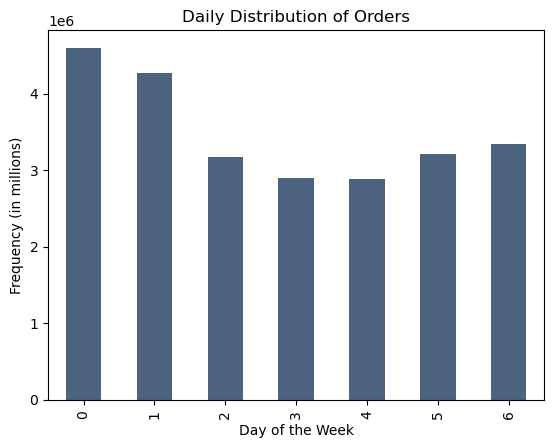

In [213]:
# Bar chart busiest day of the week
busiest_dow = df_all['orders_day_of_week'].value_counts().sort_index().plot.bar(color = '#4c627f')

plt.xlabel('Day of the Week')  # Label for the x-axis
plt.ylabel('Frequency (in millions)') # Label for the y-axis
plt.title('Daily Distribution of Orders') # Chart title

In [215]:
# Save chart

busiest_dow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'busiest_dow.png'), bbox_inches='tight')

Text(0.5, 1.0, 'Orders by Time of the Day')

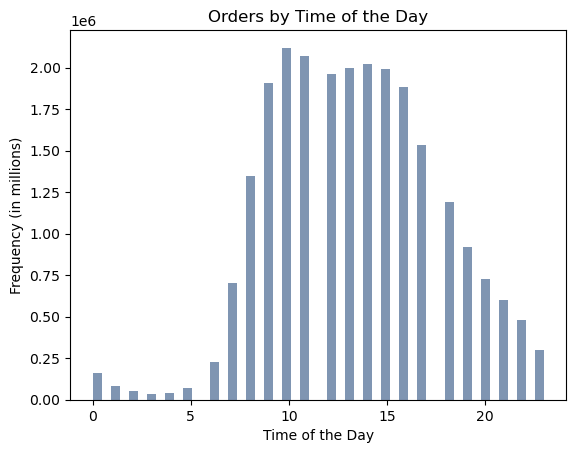

In [216]:
# Histogram busiest hour of day
busiest_hod = df_all['order_hour_of_day'].plot.hist(bins = 50, color = '#7f95b2')

plt.xlabel('Time of the Day')  # Label for the x-axis
plt.ylabel('Frequency (in millions)') # Label for the y-axis
plt.title('Orders by Time of the Day')  # Title of the histogram

In [218]:
# Save chart

busiest_hod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_hod.png'), bbox_inches='tight')

### Key Question 2

In [219]:
# Create sample data
np.random.seed(4)
dev = np.random.rand(len(df_all)) <= 0.7

# Store 70% of the sample in the data frame big
big = df_all[dev]

# Store 30% of the sample in the data frame small
small = df_all[~dev] 

In [220]:
# Check the output

len(df_all)

24414877

In [221]:
len(big)+len(small)

24414877

In [224]:
# Reduce the samples to only those columns necessary for the chart

sample = small[['order_hour_of_day', 'average_product_price']]

/Users/giadairene/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/giadairene/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Trend of Product Price by Order Time')

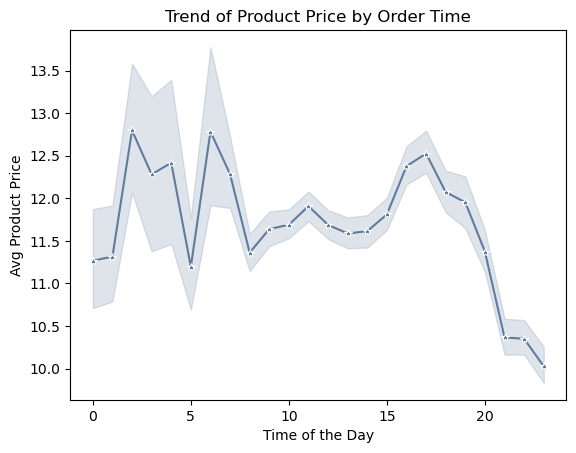

In [226]:
# Create line chart

line_dow = sns.lineplot(data = sample, x = 'order_hour_of_day', y = 'average_product_price', marker='*', color = '#5f7b9f')

plt.xlabel('Time of the Day')  # Label for the x-axis
plt.ylabel ('Avg Product Price') # Label for the y-axis
plt.title('Trend of Product Price by Order Time')  # Title of the line chart

In [227]:
# Save chart

line_dow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_price_hod.png'), bbox_inches='tight')

### Key Question 3

In [228]:
# Price range count

df_all['price_range_loc'].value_counts(dropna= False)

price_range_loc
Mid-range product     16479445
Low-range product      7626745
High-range product      308687
Name: count, dtype: int64

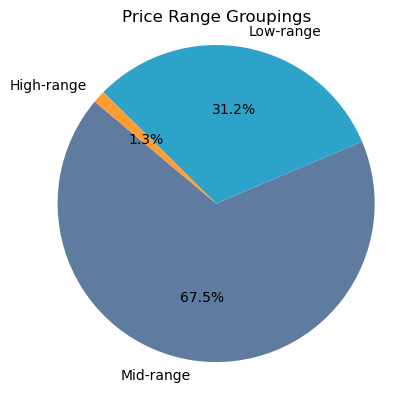

In [232]:
# Data to plot 
labels = ['Mid-range', 'Low-range', 'High-range']
sizes = [67.5, 31.2, 1.3]  # These values represent the percentages of each category
colors = ['#5f7b9f', '#2ea3c9', '#ff9c33']


# Pie chart
plt.figure(figsize=(4.5, 4.5))  # Set the size of the plot
plt.pie(sizes,  labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Price Range Groupings')  # Title of the chart

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_chart.png'), bbox_inches='tight') # Save chart

### Key Question 4

Text(0, 0.5, 'Department ID')

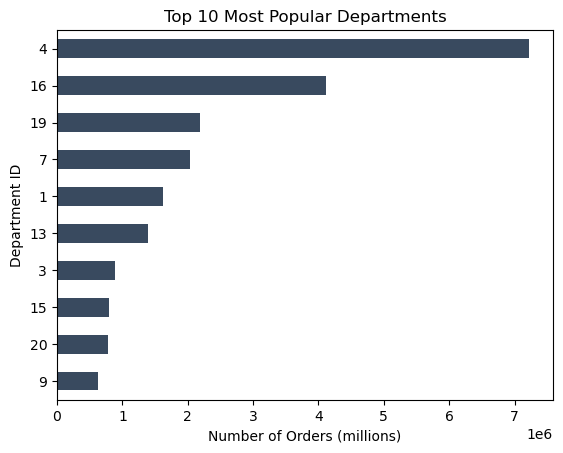

In [233]:
#Finding most popular departments

popular_dept = df_all['department_id'].value_counts(dropna=False).head(10).sort_values(ascending= True).plot.barh(color=['#394a5f'])

plt.title('Top 10 Most Popular Departments') # Chart title
plt.xlabel('Number of Orders (millions)')  # Label for the x-axis
plt.ylabel('Department ID')  # Label for the y-axis

In [235]:
# Save chart

popular_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'top_10_dept.png'), bbox_inches='tight')

Text(0, 0.5, 'Product Name')

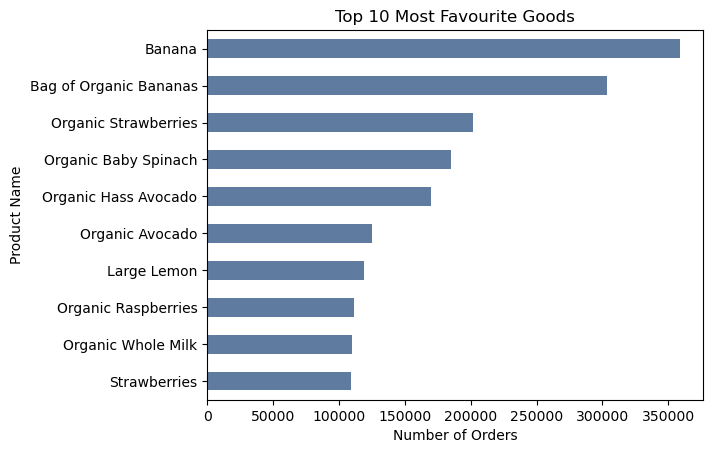

In [237]:
#Finding most favourite goods

popular_food = df_all['product_name'].value_counts(dropna=False).head(10).sort_values(ascending= True).plot.barh(color=['#5f7b9f'])

plt.title('Top 10 Most Favourite Goods') # Chart title
plt.xlabel('Number of Orders')  # Label for the x-axis
plt.ylabel('Product Name')  # Label for the y-axis

In [238]:
# Save chart

popular_food.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'top_10_goods.png'), bbox_inches='tight')

### Key Question 5

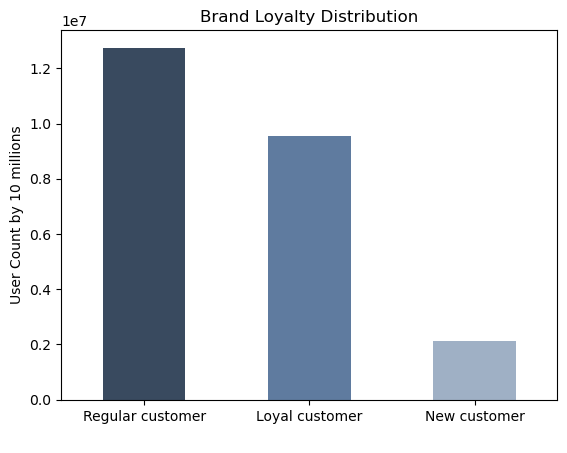

In [242]:
df_all['loyalty_flag'].value_counts().plot.bar(color =['#394a5f', '#5f7b9f', '#9fb0c5'])

plt.xticks(rotation=0) # x-axis lable angle
plt.title('Brand Loyalty Distribution') # Chart title
plt.ylabel('User Count by 10 millions')  # Label for the y-axis
plt.xlabel(' ') # Label for the x-axis

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_bar.png')) # Save figure

In [369]:
df_all['loyalty_flag'].value_counts(dropna = False)

loyalty_flag
Regular customer    12744558
Loyal customer       9555491
New customer         2114828
Name: count, dtype: int64

### Key Question 6 - Ordering habits based on loyalty status

In [243]:
df.shape

(32404859, 32)

In [246]:
# Group spending flag by loyalty flag

df_grouped = df_all.groupby(['loyalty_flag', 'spending_flag']).size().unstack()

In [247]:
# Check the output

df_grouped

spending_flag,High spender,Low spender
loyalty_flag,,
Loyal customer,201670,9353821
New customer,36271,2078557
Regular customer,244798,12499760


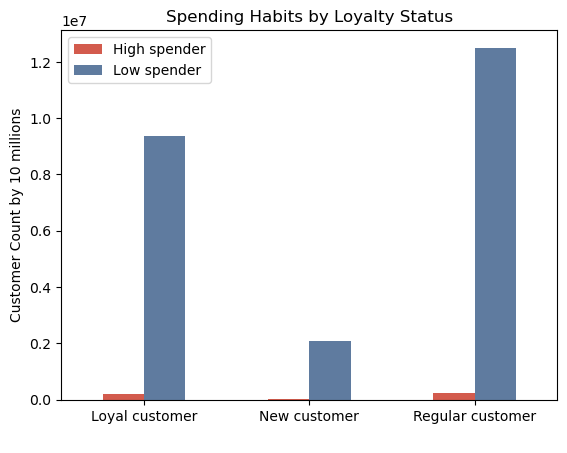

In [257]:
# Plot the bar chart
df_grouped.plot(kind = 'bar', color = ['#d35b4d','#5f7b9f'])

# Add labels and title
plt.legend(title = None)
plt.xlabel(' ')
plt.ylabel('Customer Count by 10 millions')
plt.title('Spending Habits by Loyalty Status')
plt.xticks(rotation=0)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'spending_loyalty.png')) # Save figure

In [251]:
# Group frequency flag by loyalty flag
frequency_loyalty = df_all.groupby(['loyalty_flag', 'frequency_flag']).size().unstack()

frequency_loyalty

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
loyalty_flag,,,
Loyal customer,9551879.0,NaN,3612.0
New customer,576449.0,840042.0,698337.0
Regular customer,8008430.0,623476.0,4112652.0


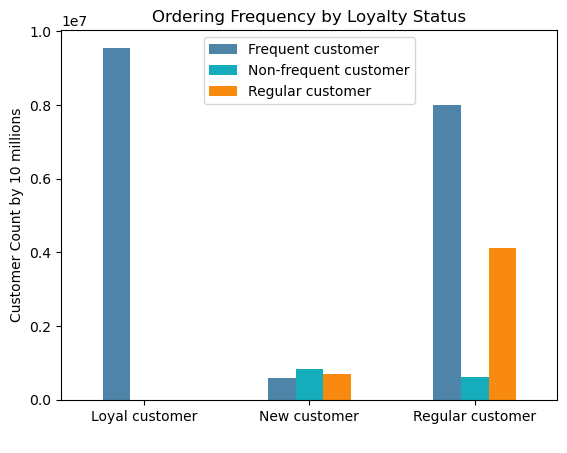

In [253]:
# Plot the bar chart
frequency_loyalty.plot(kind='bar', color=['#4d84a8', '#15adbb', '#f88a10'])

# Add labels and title
plt.legend(title = None, loc = 'upper center')
plt.xlabel(' ')
plt.ylabel('Customer Count by 10 millions')
plt.title('Ordering Frequency by Loyalty Status')
plt.xticks(rotation=0)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'frequency_loyalty.png')) # Save figure

In [254]:
# Group customer activity by loyalty flag
activity_loyalty = df.groupby(['loyalty_flag', 'customer_activity']).size().unstack()

activity_loyalty

customer_activity,high_activity customer,low_activity customers
loyalty_flag,,
Loyal customer,9555491,728602
New customer,2114828,4129162
Regular customer,12744558,3132218


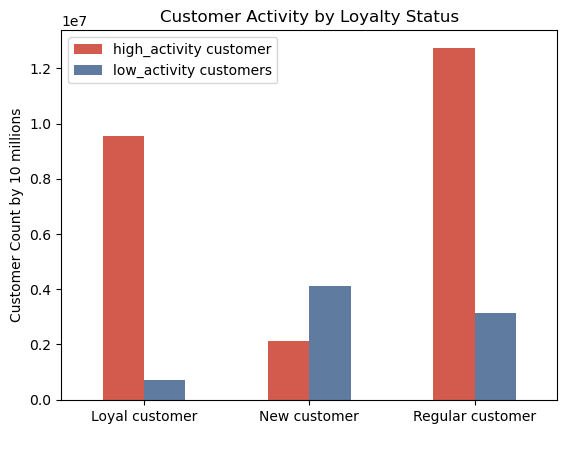

In [256]:
# Plot the bar chart
activity_loyalty.plot(kind = 'bar', color = ['#d35b4d','#5f7b9f'])

# Add labels and title
plt.legend(title = None)
plt.xlabel(' ')
plt.ylabel('Customer Count by 10 millions')
plt.title('Customer Activity by Loyalty Status')
plt.xticks(rotation=0)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'activity_loyalty.png')) # Save figure

### Key Question 7

In [258]:
# Create a subset to analyze ordering habits based on customer´s region

region_habits = df_all[['user_id','region','loyalty_flag','frequency_flag','spending_flag']]

In [259]:
# Group loyalty flag by region

loyalty_region = region_habits.groupby(['region', 'loyalty_flag']).size().unstack()
loyalty_region

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,2204617,499586,3007553
Northeast,1710886,370272,2234113
South,3163125,702481,4263480
West,2476863,542489,3239412


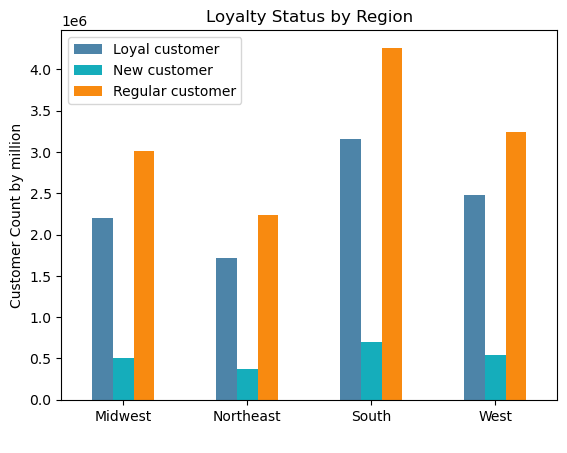

In [260]:
# Plot the bar chart
loyalty_region.plot(kind = 'bar', color = ['#4d84a8', '#15adbb', '#f88a10'])

# Add labels and title
plt.legend(title = None)
plt.xlabel(' ')
plt.ylabel('Customer Count by million')
plt.title('Loyalty Status by Region')
plt.xticks(rotation=0)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_region.png')) # Save figure

In [261]:
# Group spending flag by region

spending_region = region_habits.groupby(['region', 'spending_flag']).size().unstack()
spending_region

spending_flag,High spender,Low spender
region,,
Midwest,119208,5592548
Northeast,82617,4232654
South,159228,7969858
West,121686,6137078


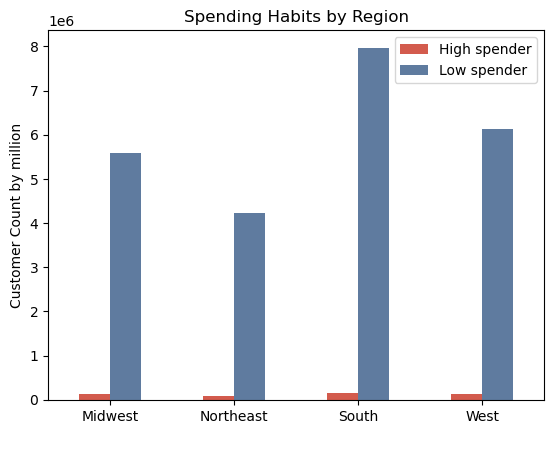

In [262]:
# Plot the bar chart
spending_region.plot(kind = 'bar', color = ['#d35b4d','#5f7b9f'])

# Add labels and title
plt.legend(title = None)
plt.xlabel(' ')
plt.ylabel('Customer Count by million')
plt.title('Spending Habits by Region')
plt.xticks(rotation=0)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'spending_region.png')) # Save figure

In [263]:
# Group frequency flag by region

frequency_region = region_habits.groupby(['region', 'frequency_flag']).size().unstack()
frequency_region

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
region,,,
Midwest,4213478,350154,1148124
Northeast,3204565,250508,860198
South,6049059,490297,1589730
West,4669656,372559,1216549


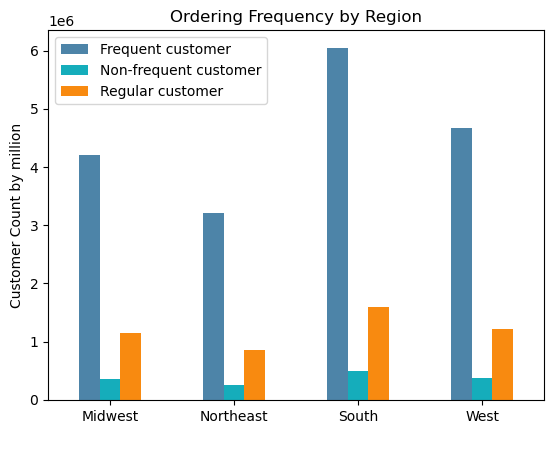

In [264]:
# Plot the bar chart
frequency_region.plot(kind = 'bar', color = ['#4d84a8', '#15adbb', '#f88a10'])

# Add labels and title
plt.legend(title = None)
plt.xlabel(' ')
plt.ylabel('Customer Count by million')
plt.title('Ordering Frequency by Region')
plt.xticks(rotation=0)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'frequency_region.png')) # Save figure

### Key Question 8

In [265]:
df_all['customer_profile']

0           upper-class mid age
1           upper-class mid age
2           upper-class mid age
6           upper-class mid age
7           upper-class mid age
                   ...         
32404813      low-income senior
32404814      low-income senior
32404815      low-income senior
32404816      low-income senior
32404817      low-income senior
Name: customer_profile, Length: 24414877, dtype: object

In [268]:
# Define age groups

df_all.loc[(df_all['age'] >= 18) & (df_all['age'] <= 40), 'age_group'] = 'young adult'

In [269]:
df_all.loc[(df_all['age'] > 40) & (df_all['age'] <= 60), 'age_group'] = 'mid-age'

In [270]:
df_all.loc[(df_all['age'] > 60), 'age_group'] = 'senior'

In [271]:
# Create a subset to analyze ordering habits based on customer´s age and family status

age_fam_habits = df_all[['user_id','age_group','family_status','loyalty_flag','frequency_flag','spending_flag']]

In [272]:
age_fam_habits

,user_id,age_group,family_status,loyalty_flag,frequency_flag,spending_flag
0,26711,mid-age,married,New customer,Regular customer,Low spender
1,26711,mid-age,married,New customer,Regular customer,Low spender
2,26711,mid-age,married,New customer,Regular customer,Low spender
6,26711,mid-age,married,New customer,Regular customer,Low spender
7,26711,mid-age,married,New customer,Regular customer,Low spender
...,...,...,...,...,...,...
32404813,135902,senior,married,New customer,Frequent customer,Low spender
32404814,135902,senior,married,New customer,Frequent customer,Low spender
32404815,135902,senior,married,New customer,Frequent customer,Low spender
32404816,135902,senior,married,New customer,Frequent customer,Low spender


In [273]:
# Group loyalty status by age group

loyalty_age = age_fam_habits.groupby(['age_group', 'loyalty_flag']).size().unstack()
loyalty_age

loyalty_flag,Loyal customer,New customer,Regular customer
age_group,,,
mid-age,3015188,663434,3967704
senior,3126311,696979,4145569
young adult,3413992,754415,4631285


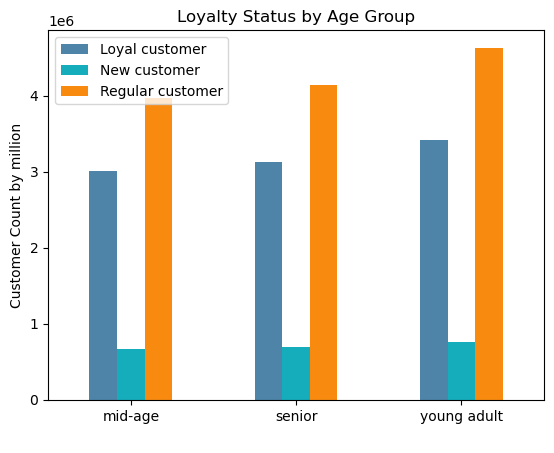

In [275]:
# Plot the bar chart
loyalty_age.plot(kind = 'bar', color = ['#4d84a8', '#15adbb', '#f88a10'])

# Add labels and title
plt.legend(title = None, loc = 'upper left')
plt.xlabel(' ')
plt.ylabel('Customer Count by million')
plt.title('Loyalty Status by Age Group')
plt.xticks(rotation=0)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_age.png')) # Save figure

In [276]:
# Group spending flag by age group

spending_age = age_fam_habits.groupby(['age_group', 'spending_flag']).size().unstack()
spending_age

spending_flag,High spender,Low spender
age_group,,
mid-age,155585,7490741
senior,160034,7808825
young adult,167120,8632572


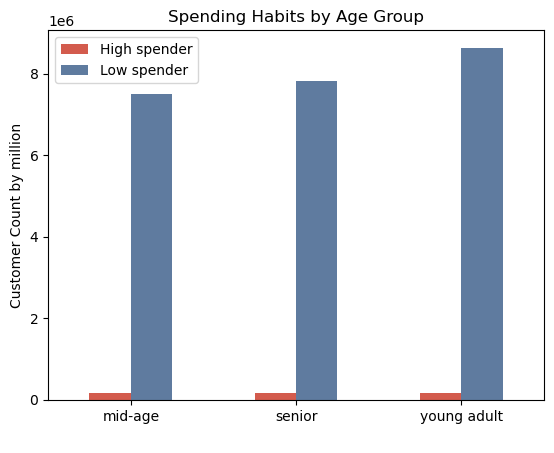

In [277]:
# Plot the bar chart
spending_age.plot(kind = 'bar', color = ['#d35b4d','#5f7b9f'])

# Add labels and title
plt.legend(title = None)
plt.xlabel(' ')
plt.ylabel('Customer Count by million')
plt.title('Spending Habits by Age Group')
plt.xticks(rotation=0)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'spending_age.png')) # Save figure

In [278]:
# Group frequency flag by age group

frequency_age = age_fam_habits.groupby(['age_group', 'frequency_flag']).size().unstack()
frequency_age

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
age_group,,,
mid-age,5674105,463973,1508248
senior,5935418,475461,1557980
young adult,6527235,524084,1748373


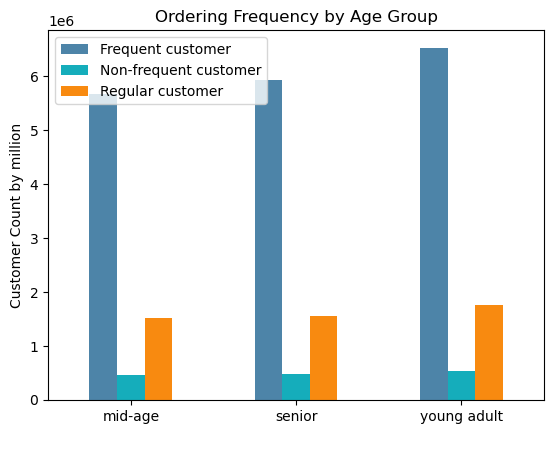

In [279]:
# Plot the bar chart
frequency_age.plot(kind = 'bar', color = ['#4d84a8', '#15adbb', '#f88a10'])

# Add labels and title
plt.legend(title = None, loc = 'upper left')
plt.xlabel(' ')
plt.ylabel('Customer Count by million')
plt.title('Ordering Frequency by Age Group')
plt.xticks(rotation=0)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'frequency_age.png')) # Save figure

In [280]:
# Group loyalty status by family status

loyalty_fam = age_fam_habits.groupby(['family_status', 'loyalty_flag']).size().unstack()
loyalty_fam

loyalty_flag,Loyal customer,New customer,Regular customer
family_status,,,
divorced/widowed,820006,177928,1091278
living with parents and siblings,457558,97698,616143
married,6691990,1488311,8958175
single,1585937,350891,2078962


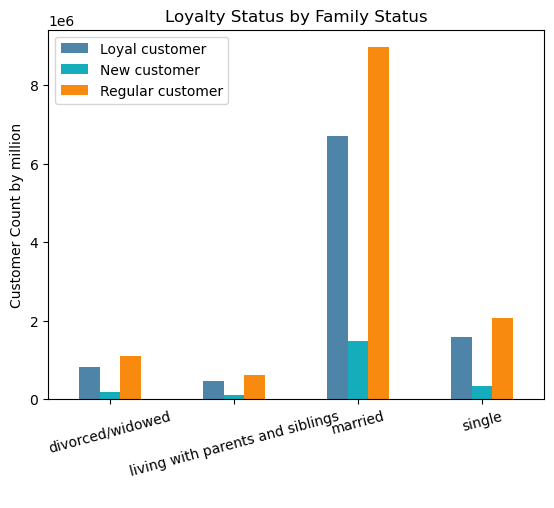

In [284]:
# Plot the bar chart
loyalty_fam.plot(kind = 'bar', color = ['#4d84a8', '#15adbb', '#f88a10'])

# Add labels and title
plt.legend(title = None, loc = 'upper left')
plt.xlabel(' ')
plt.ylabel('Customer Count by million')
plt.title('Loyalty Status by Family Status')
plt.xticks(rotation=15)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_fam.png'), bbox_inches='tight') # Save figure

In [285]:
# Group spending flag by family status

spending_fam = age_fam_habits.groupby(['family_status', 'spending_flag']).size().unstack()
spending_fam

spending_flag,High spender,Low spender
family_status,,
divorced/widowed,40462,2048750
living with parents and siblings,22824,1148575
married,343519,16794957
single,75934,3939856


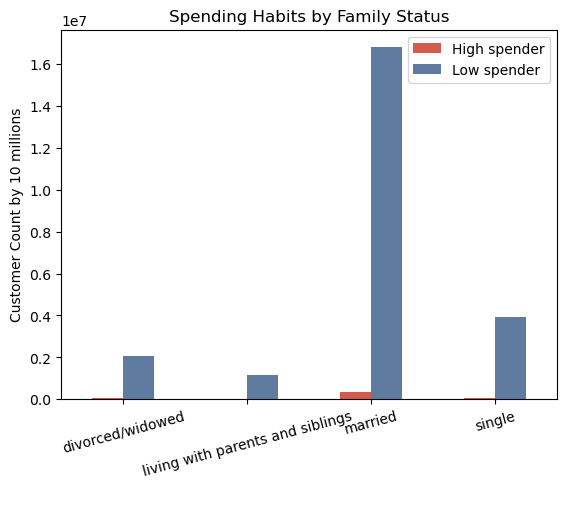

In [290]:
# Plot the bar chart
spending_fam.plot(kind = 'bar', color = ['#d35b4d','#5f7b9f'])

# Add labels and title
plt.legend(title = None)
plt.xlabel(' ')
plt.ylabel('Customer Count by 10 millions')
plt.title('Spending Habits by Family Status')
plt.xticks(rotation=15)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'spending_fam.png'), bbox_inches='tight') # Save figure

In [287]:
# Group frequency flag by family status

frequency_fam = age_fam_habits.groupby(['family_status', 'frequency_flag']).size().unstack()
frequency_fam

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
family_status,,,
divorced/widowed,1556391,123643,409178
living with parents and siblings,883343,71052,217004
married,12728905,1031153,3378418
single,2968119,237670,810001


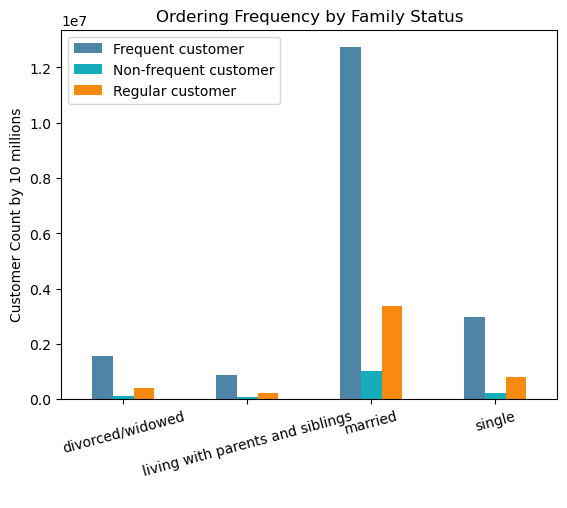

In [289]:
# Plot the bar chart
frequency_fam.plot(kind = 'bar', color = ['#4d84a8', '#15adbb', '#f88a10'])

# Add labels and title
plt.legend(title = None)
plt.xlabel(' ')
plt.ylabel('Customer Count by 10 millions')
plt.title('Ordering Frequency by Family Status')
plt.xticks(rotation=15)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'frequency_fam.png'), bbox_inches='tight') # Save figure

### Key Question 9

In [293]:
# Define income groups

df_all.loc[(df_all['income'] <= 96836), 'income_group'] = 'Medium income'

In [292]:
df_all.loc[(df_all['income'] > 96836) & (df_all['income'] <= 128160), 'income_group'] = 'High income'

In [294]:
df_all.loc[(df_all['income'] > 128160), 'income_group'] = 'Very high income'

In [308]:
df_all['income_group'].value_counts(dropna = False)

income_group
Medium income       12207662
High income          6103680
Very high income     6103535
Name: count, dtype: int64

In [309]:
df_all['income_group'].value_counts().sum()

24414877

In [297]:
# Define dependants group

df_all.loc[(df_all['no_of_dependants'] == 0), 'dependants_group'] = 'No dependants'

In [299]:
df_all.loc[(df_all['no_of_dependants'] != 0), 'dependants_group'] = 'Have dependants'

In [300]:
df_all['dependants_group'].value_counts(dropna = False)

dependants_group
Have dependants    18309875
No dependants       6105002
Name: count, dtype: int64

In [301]:
df_all['dependants_group'].value_counts().sum()

24414877

In [304]:
df_all['age_group'].value_counts(dropna = False)

age_group
young adult    8799692
senior         7968859
mid-age        7646326
Name: count, dtype: int64

In [305]:
df_all['age_group'].value_counts().sum()

24414877

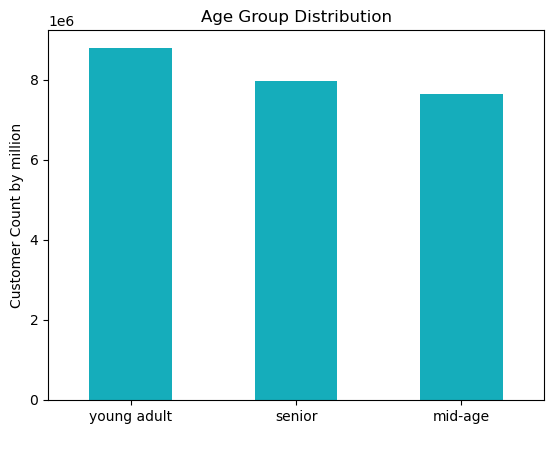

In [303]:
# Create a bar chart for the age distribution

df_all['age_group'].value_counts().plot.bar(color =['#15adbb'])

plt.xticks(rotation=0) # x-axis lable angle
plt.title('Age Group Distribution') # Chart title
plt.ylabel('Customer Count by million')  # Label for the y-axis
plt.xlabel(' ') # Label for the x-axis

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_distribution.png')) # Save figure

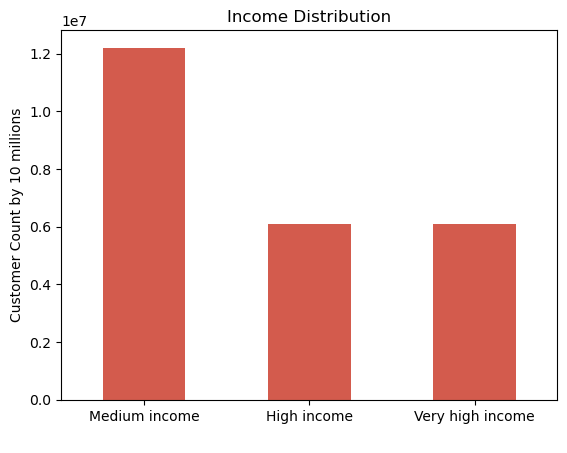

In [307]:
# Create a bar chart for the income distribution

df_all['income_group'].value_counts().plot.bar(color =['#d35b4d'])

plt.xticks(rotation=0) # x-axis lable angle
plt.title('Income Distribution') # Chart title
plt.ylabel('Customer Count by 10 millions')  # Label for the y-axis
plt.xlabel(' ') # Label for the x-axis

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_distribution.png')) # Save figure

In [372]:
df_all['income_group'].value_counts(dropna = False)

income_group
Medium income       12207662
High income          6103680
Very high income     6103535
Name: count, dtype: int64

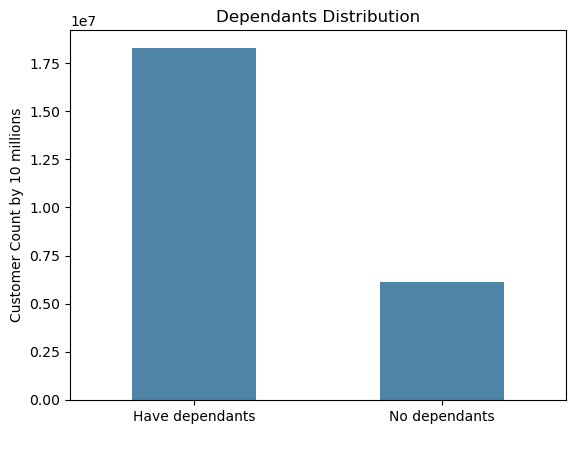

In [310]:
# Create a bar chart for the dependants distribution

df_all['dependants_group'].value_counts().plot.bar(color =['#4d84a8'])

plt.xticks(rotation=0) # x-axis lable angle
plt.title('Dependants Distribution') # Chart title
plt.ylabel('Customer Count by 10 millions')  # Label for the y-axis
plt.xlabel(' ') # Label for the x-axis

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependants_distribution.png')) # Save figure

In [373]:
df_all['dependants_group'].value_counts(dropna = False)

dependants_group
Have dependants    18309875
No dependants       6105002
Name: count, dtype: int64

### Key Question 10

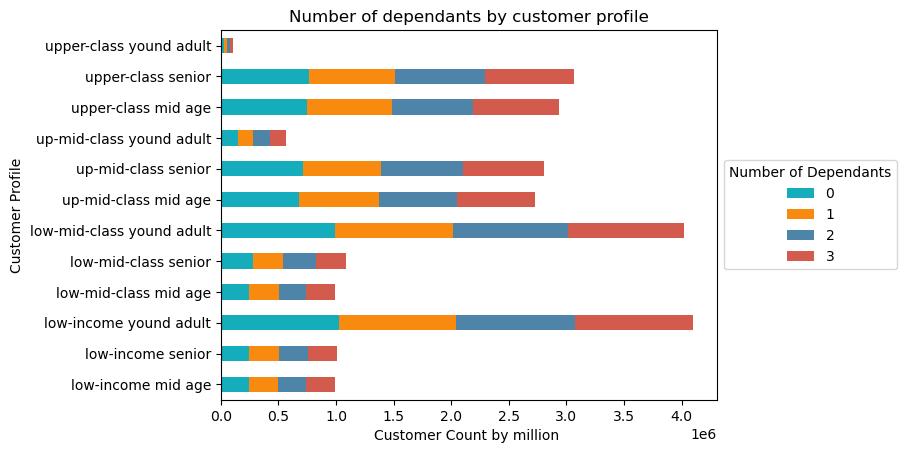

In [321]:
# Create a stacked bar chart to compare customer profile with number of dependants

colors=['#15adbb', '#f88a10', '#4d84a8', '#d35b4d']

custom_dependants.plot.barh(stacked = True, color = colors)

plt.title('Number of dependants by customer profile') # Chart title
plt.ylabel('Customer Profile')  # Label for the y-axis
plt.xlabel('Customer Count by million ') # Label for the x-axis
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5), title = 'Number of Dependants') # Set legend next to chart

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dependants_customer_profile.png'),bbox_inches='tight')

In [324]:
# Create a crosstab to analyse price of orders among customer profiles

crtab_prices = pd.crosstab(df_all['price_range_loc'], df_all['customer_profile'], dropna = False, margins = False)
crtab_prices

customer_profile,low-income mid age,low-income senior,low-income yound adult,low-mid-class mid age,low-mid-class senior,low-mid-class yound adult,up-mid-class mid age,up-mid-class senior,up-mid-class yound adult,upper-class mid age,upper-class senior,upper-class yound adult
price_range_loc,,,,,,,,,,,,
High-range product,5113,5095,45826,13085,14926,54171,36941,38657,7800,41693,42795,2585
Low-range product,410961,415102,1350663,295659,322744,1196516,809750,837245,168779,874107,912333,32886
Mid-range product,576600,588560,2705814,683166,750227,2773434,1882469,1933260,388779,2016782,2107915,72439


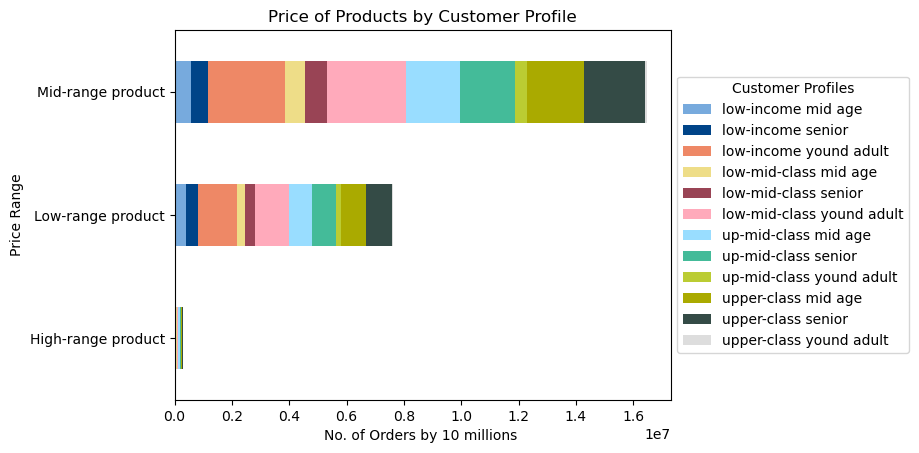

In [326]:
# Create a stacked bar chart from crosstab data to visualize customer purchase behaviour

colors = ['#77AADD','#004488','#EE8866','#EEDD88','#994455','#FFAABB','#99DDFF','#44BB99','#BBCC33','#AAAA00','#344b46','#DDDDDD']

crtab_prices.plot.barh(stacked = True, color = colors)

plt.title('Price of Products by Customer Profile') # Chart title
plt.ylabel('Price Range')  # Label for the y-axis
plt.xlabel('No. of Orders by 10 millions ') # Label for the x-axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Customer Profiles') # Set legend next to chart

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'prices_customer_profile.png'),bbox_inches='tight')

In [327]:
# Create a crosstab to analyse frequency of orders among customer profiles

crtab_frequency = pd.crosstab(df_all['frequency_flag'], df_all['customer_profile'], dropna = False, margins = False)
crtab_frequency

customer_profile,low-income mid age,low-income senior,low-income yound adult,low-mid-class mid age,low-mid-class senior,low-mid-class yound adult,up-mid-class mid age,up-mid-class senior,up-mid-class yound adult,upper-class mid age,upper-class senior,upper-class yound adult
frequency_flag,,,,,,,,,,,,
Frequent customer,726419,733250,3033134,739400,821185,2997839,2036751,2085547,411777,2171535,2295436,84485
Non-frequent customer,72637,73018,255344,59080,64042,228778,160272,165860,33473,171984,172541,6489
Regular customer,193618,202489,813825,193430,202670,797504,532137,557755,120108,589063,595066,16936


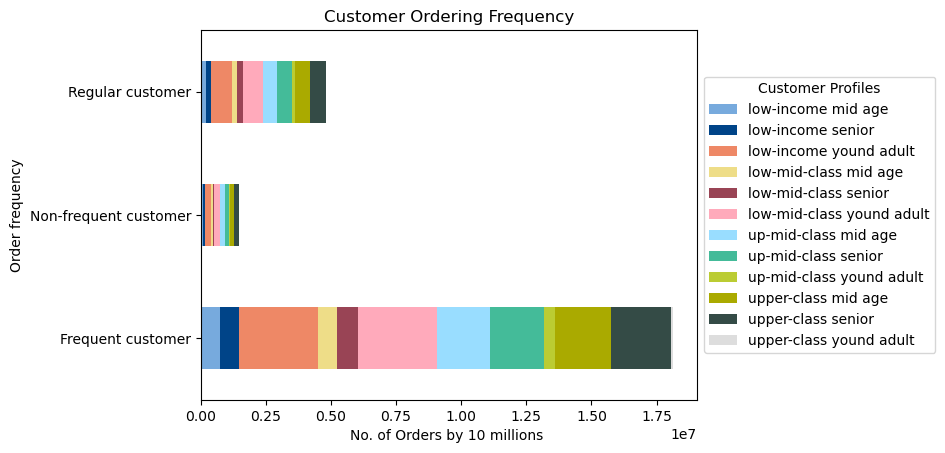

In [329]:
# Create a stacked bar chart from crosstab data to visualize customer purchase behaviour

colors = ['#77AADD','#004488','#EE8866','#EEDD88','#994455','#FFAABB','#99DDFF','#44BB99','#BBCC33','#AAAA00','#344b46','#DDDDDD']

crtab_frequency.plot.barh(stacked = True, color = colors)

plt.title('Customer Ordering Frequency') # Chart title
plt.ylabel('Order frequency')  # Label for the y-axis
plt.xlabel('No. of Orders by 10 millions ') # Label for the x-axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Customer Profiles') # Set legend next to chart

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'frequency_customer_profile.png'),bbox_inches='tight')

In [330]:
# Create a crosstab to analyse spending habits among customer profiles

crtab_spend = pd.crosstab(df_all['spending_flag'], df_all['customer_profile'], dropna = False, margins = False)
crtab_spend

customer_profile,low-income mid age,low-income senior,low-income yound adult,low-mid-class mid age,low-mid-class senior,low-mid-class yound adult,up-mid-class mid age,up-mid-class senior,up-mid-class yound adult,upper-class mid age,upper-class senior,upper-class yound adult
spending_flag,,,,,,,,,,,,
High spender,342,251,15198,5436,10072,21219,19182,20117,22793,130625,129594,107910
Low spender,992332,1008506,4087105,986474,1077825,4002902,2709978,2789045,542565,2801957,2933449,0


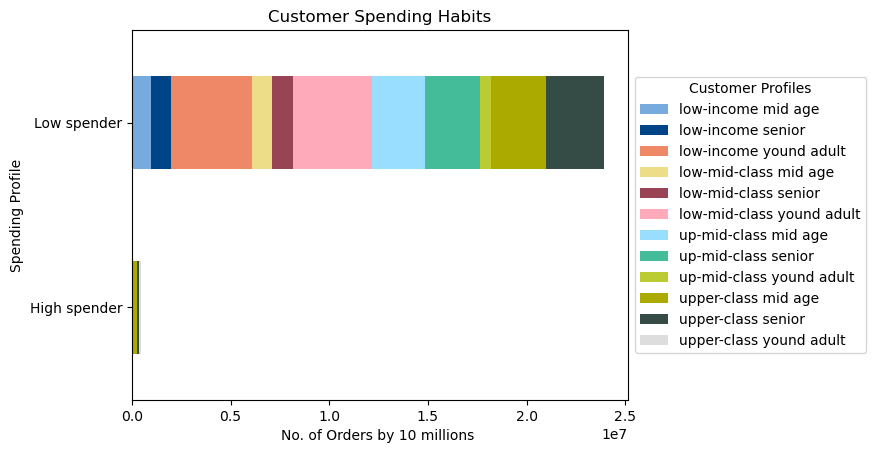

In [354]:
# Create a stacked bar chart from crosstab data to visualize customer purchase behaviour

colors = ['#77AADD','#004488','#EE8866','#EEDD88','#994455','#FFAABB','#99DDFF','#44BB99','#BBCC33','#AAAA00','#344b46','#DDDDDD']

crtab_spend.plot.barh(stacked = True, color = colors)

plt.title('Customer Spending Habits') # Chart title
plt.ylabel('Spending Profile')  # Label for the y-axis
plt.xlabel('No. of Orders by 10 millions ') # Label for the x-axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Customer Profiles') # Set legend next to chart

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spending_customer_profile.png'),bbox_inches='tight')

In [331]:
# Create a crosstab to analyse loyalty status among customer profiles

crtab_loyalty = pd.crosstab(df_all['loyalty_flag'], df_all['customer_profile'], dropna = False, margins = False)
crtab_loyalty

customer_profile,low-income mid age,low-income senior,low-income yound adult,low-mid-class mid age,low-mid-class senior,low-mid-class yound adult,up-mid-class mid age,up-mid-class senior,up-mid-class yound adult,upper-class mid age,upper-class senior,upper-class yound adult
loyalty_flag,,,,,,,,,,,,
Loyal customer,392756,372099,1579011,397499,435601,1586891,1110182,1104575,197324,1114751,1214036,50766
New customer,104094,104607,368758,84885,89280,329002,223828,241555,50200,250627,261537,6455
Regular customer,495824,532051,2154534,509526,563016,2108228,1395150,1463032,317834,1567204,1587470,50689


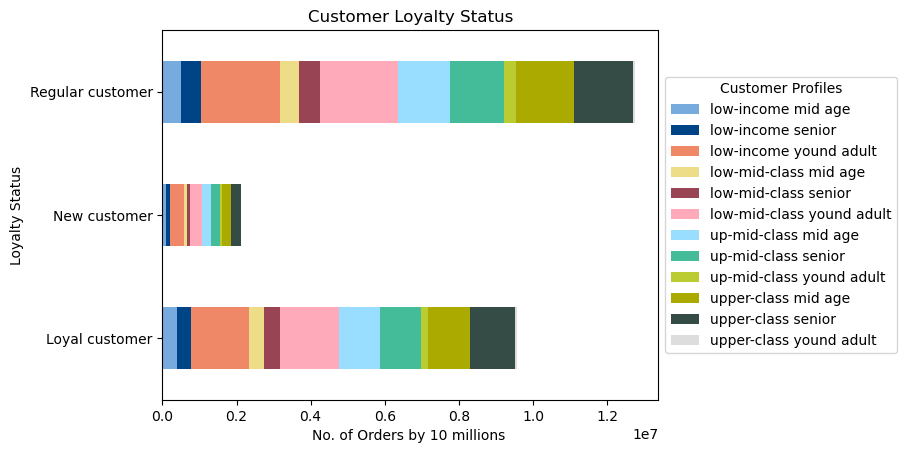

In [355]:
# Create a stacked bar chart from crosstab data to visualize customer purchase behaviour

colors = ['#77AADD','#004488','#EE8866','#EEDD88','#994455','#FFAABB','#99DDFF','#44BB99','#BBCC33','#AAAA00','#344b46','#DDDDDD']

crtab_loyalty.plot.barh(stacked = True, color = colors)

plt.title('Customer Loyalty Status') # Chart title
plt.ylabel('Loyalty Status')  # Label for the y-axis
plt.xlabel('No. of Orders by 10 millions ') # Label for the x-axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Customer Profiles') # Set legend next to chart

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_customer_profile.png'),bbox_inches='tight')

In [332]:
# Create a crosstab to analyse regional distribution of customer profiles

crtab_region = pd.crosstab(df_all['region'], df_all['customer_profile'], dropna = False, margins = False)
crtab_region

customer_profile,low-income mid age,low-income senior,low-income yound adult,low-mid-class mid age,low-mid-class senior,low-mid-class yound adult,up-mid-class mid age,up-mid-class senior,up-mid-class yound adult,upper-class mid age,upper-class senior,upper-class yound adult
region,,,,,,,,,,,,
Midwest,229727,229779,949018,222344,239497,931943,656865,664224,135071,714925,714683,23680
Northeast,175048,184546,717984,165707,192467,716919,492083,500370,90217,508319,552517,19094
South,330698,338567,1377291,341293,372878,1370992,874808,918893,192706,951046,1018934,40980
West,257201,255865,1058010,262566,283055,1004267,705404,725675,147364,758292,776909,24156


In [371]:
crtab_region.to_excel (r'/Users/giadairene/Desktop/crtab_region.xlsx', index = False, header=True)

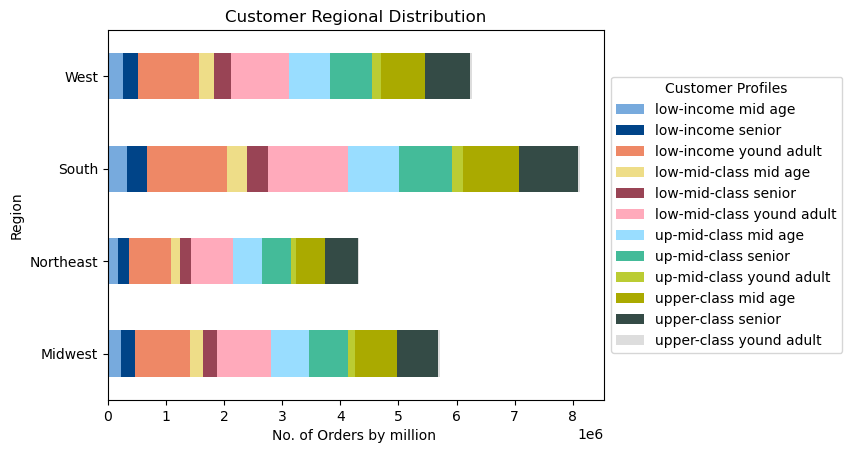

In [370]:
# Create a stacked bar chart from crosstab data to visualize customer purchase behaviour

colors = ['#77AADD','#004488','#EE8866','#EEDD88','#994455','#FFAABB','#99DDFF','#44BB99','#BBCC33','#AAAA00','#344b46','#DDDDDD']

crtab_region.plot.barh(stacked = True, color = colors)

plt.title('Customer Regional Distribution') # Chart title
plt.ylabel('Region')  # Label for the y-axis
plt.xlabel('No. of Orders by million ') # Label for the x-axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Customer Profiles') # Set legend next to chart

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_customer_profile.png'),bbox_inches='tight')

In [352]:
df_all['product_name'].value_counts(dropna=False).head(10)

product_name
Banana                    358668
Bag of Organic Bananas    303632
Organic Strawberries      201955
Organic Baby Spinach      184749
Organic Hass Avocado      169658
Organic Avocado           124727
Large Lemon               118655
Organic Raspberries       111741
Organic Whole Milk        109633
Strawberries              108817
Name: count, dtype: int64

In [353]:
# Create a crosstab to analyse goods preference based on customer profiles

fav_prods = df_all[df_all['product_name'].isin(['Banana','Bag of Organic Bananas','Organic Strawberries',
                                                               'Organic Baby Spinach','Organic Hass Avocado','Organic Avocado',
                                                               'Large Lemon','Organic Raspberries','Organic Whole Milk',
                                                               'Strawberries'])]

crtab_prods = pd.crosstab(fav_prods['product_name'], df_all['customer_profile'], dropna = False, margins = False)
crtab_prods

customer_profile,low-income mid age,low-income senior,low-income yound adult,low-mid-class mid age,low-mid-class senior,low-mid-class yound adult,up-mid-class mid age,up-mid-class senior,up-mid-class yound adult,upper-class mid age,upper-class senior,upper-class yound adult
product_name,,,,,,,,,,,,
Bag of Organic Bananas,12921,13152,50680,12309,13303,49781,34137,35960,7311,35455,37769,854
Banana,10706,10509,57860,15036,17439,62126,41978,40991,8420,44867,47283,1453
Large Lemon,2571,2424,19118,5004,5560,20764,14655,14353,3068,15105,15757,276
Organic Avocado,3259,3384,19717,5200,5959,22379,15036,14302,3243,15728,16267,253
Organic Baby Spinach,5970,5861,30214,7484,8617,32030,21375,21581,4419,23289,23710,199
Organic Hass Avocado,6179,6749,27743,7031,7625,28572,19331,20543,4178,20286,21255,166
Organic Raspberries,4171,4454,18838,4223,5166,18548,12355,13624,2633,13493,13849,387
Organic Strawberries,6741,7094,33288,8571,9205,34676,22612,24685,4764,24327,25696,296
Organic Whole Milk,2205,1820,17362,4473,4929,19928,13164,14504,2594,14088,14358,208


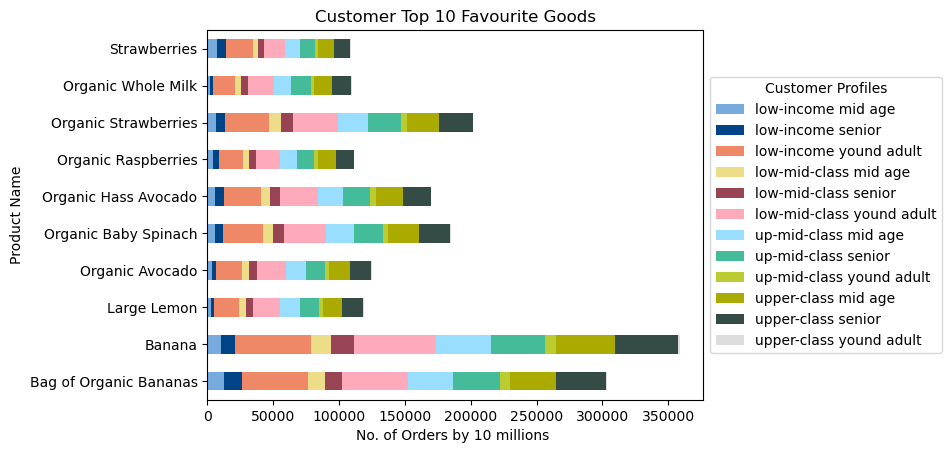

In [356]:
# Create a stacked bar chart from crosstab data to visualize customer purchase behaviour

colors = ['#77AADD','#004488','#EE8866','#EEDD88','#994455','#FFAABB','#99DDFF','#44BB99','#BBCC33','#AAAA00','#344b46','#DDDDDD']

crtab_prods.plot.barh(stacked = True, color = colors)

plt.title('Customer Top 10 Favourite Goods') # Chart title
plt.ylabel('Product Name')  # Label for the y-axis
plt.xlabel('No. of Orders by 10 millions ') # Label for the x-axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Customer Profiles') # Set legend next to chart

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'prods_customer_profile.png'),bbox_inches='tight')